# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Step 1 - Importing the exported merged dataset from Exercise 4.9

In [3]:
# Creating a path to project folder. 

path = r'C:\Users\TanaT\(CF) Achievement 4 - Instacart Basket Analysis'

# Importing merged data from 4.9 that contains customers data. 

df =  pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'customer_and_merged.pkl'))  

In [4]:
# Checking dataframe.

df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,merge_status
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


In [5]:
# Checking shape of dataframe. 

df.shape

(32404859, 34)

## Step 2 - Addressing Data Security Risks.

Consider any security implications that might exist for this new data. 
Any PII in the data will need to be addressed before continuing the analysis.

In [6]:
# Checking columns for any data that could contain PII and sensitive information. 

df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'ordering_behavior_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       'merge_status'],
      dtype='object')

- This dataset contains PII such as first and last names of customers.
- Paired with other sensitive data (age, location, gender), this could pose as a privacy risk.
- Therefore the columns 'first_name' and 'last_name' will be dropped.
- They are not useful to the analysis and user_id can be used to identity customers instead. 

In [8]:
# Dropping columns that contain PII.
# Overwriting the original dataframe, since names will not be used going foward. 

df.drop(columns = ['first_name', 'last_name'], axis = 1, inplace = True)

In [10]:
# Checking that columns were removed. 

df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'ordering_behavior_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'merge_status'],
      dtype='object')

In [11]:
# Checking shape. 

df.shape

(32404859, 32)

## Preparing data for analysis and use in related notebooks.

#### Importing wrangled departments data for the creation of customer profiles (located in separate notebook).

In [13]:
# Importing wrangled departments data as a csv file.

df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data','departments_wrangled.csv' ), index_col = False)

# Checking dataframe. 
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [16]:
# Renaming the first column (should be the department id).

df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

# Checking updated dataframe.

df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [17]:
# Connecting the department data with updated dataframe addressing PII. 

# Making the department data a dictionary. 

zipped = zip(df_dept['department_id'], df_dept['department'])
data_dict = dict(zipped)

# Checking dictionary. 

data_dict


{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [18]:
# Mapping the info to connect department names to 'department_id'. 

# Making new 'department' column to show name of department. 

df['department'] = df['department_id'].map(data_dict)

# Checking updated dataframe. 

df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,ordering_behavior_flag,gender,state,age,date_joined,n_dependants,fam_status,income,merge_status,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,both,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,both,snacks
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both,snacks
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,both,snacks


In [19]:
# Checking shape of updated dataframe with new column. 

df.shape

(32404859, 33)

## Step 3 - Create a regional segmentation of the data. 

- A regional column will be created based on the 'state' column.
- Regions will be based on the divisons outlined in the provided link.
  (https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States)

In [20]:
# Creating a dictionary mapping the states to regions. 

state_to_region = {
    # Northeast
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast', 'Massachusetts': 'Northeast', 
    'Rhode Island': 'Northeast', 'Connecticut': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'New Jersey': 'Northeast',
    
    # Midwest
    'Wisconsin': 'Midwest', 'Michigan': 'Midwest', 'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest',
    'North Dakota': 'Midwest', 'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest', 'Minnesota': 'Midwest', 
    'Iowa': 'Midwest', 'Missouri': 'Midwest',
    
    # South
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South', 'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South',
    'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South',
    'Alabama': 'South', 'Oklahoma': 'South', 'Texas': 'South', 'Arkansas': 'South', 'Louisiana': 'South',
    
    # West
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Nevada': 'West', 'Utah': 'West', 'Colorado': 'West', 'Arizona': 'West', 'New Mexico': 'West',
    'Alaska': 'West', 'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Hawaii': 'West'
}


In [21]:
# Creating a new 'region' column and assigning regions for each state. 

df['region'] = df['state'].map(state_to_region)

# Checking results of mapping. 

df[['state', 'region']]

,state,region
0,Minnesota,Midwest
1,Minnesota,Midwest
2,Vermont,Northeast
3,Wisconsin,Midwest
4,Wisconsin,Midwest
...,...,...
32404854,Rhode Island,Northeast
32404855,West Virginia,South
32404856,Michigan,Midwest
32404857,Michigan,Midwest


In [22]:
# Checking dataframe. 

df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,gender,state,age,date_joined,n_dependants,fam_status,income,merge_status,department,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,snacks,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Male,Minnesota,81,8/1/2019,1,married,49620,both,snacks,Midwest
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Female,Vermont,66,6/16/2018,2,married,158302,both,snacks,Northeast
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Female,Wisconsin,40,2/9/2020,3,married,31308,both,snacks,Midwest
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Female,Wisconsin,40,2/9/2020,3,married,31308,both,snacks,Midwest


In [23]:
# Checking shape of updated dataframe. 

df.shape

(32404859, 34)

### Determine whether there is a difference in spending habits between the different U.S. regions. 

In [24]:
# Creating a crosstab of the 'region' column with the 'spending_flag' column to see how spending differs across the 4 regions. 

crosstab_regional_spending = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

# Checking crosstab.

crosstab_regional_spending

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [25]:
# Counting the 'spending_flag'.

df['spending_flag'].value_counts(dropna = False)

spending_flag
Low spender     31770614
High spender      634245
Name: count, dtype: int64

In [26]:
# Copying crosstab to clipboard to open in Excel

crosstab_regional_spending.to_clipboard()

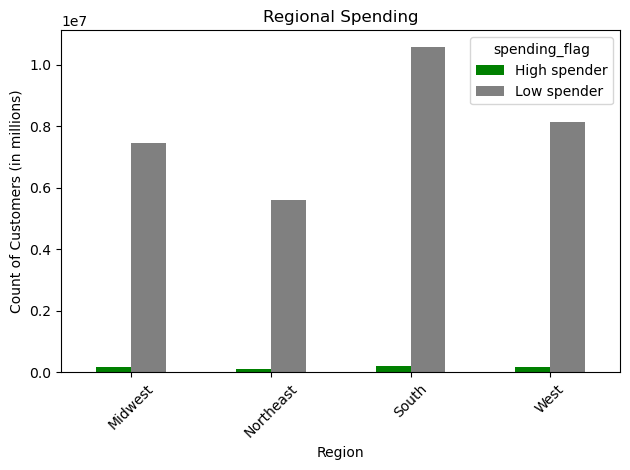

In [27]:
# Creating a bar chart to visualize crosstab. 

ax = crosstab_regional_spending.plot(kind="bar", color = ['green', 'gray'] )

# Title 
plt.title ('Regional Spending')

# Rotating labels for better readability 
plt.xlabel ('Region')
plt.xticks(rotation=45)

# Y-axis label is in scientific notation (1e7 is actually 10 million) so it is showing raw counts. 
plt.ylabel ('Count of Customers (in millions)')

# Layout
plt.tight_layout()


Observations:

- When comparing customers in terms of high vs low spending, the bar chart shows that most customers are considered low spenders in all of the regions, with a low frequency of high spending customers.
  
- All of the regions seem to follow this behavior, meaning there is no unique difference in spending habits between the regions. 

#### Exporting bar chart

In [29]:
# Exporting chart. 

ax.figure.savefig(os.path.join(path, '04 Analysis and Results','Visualizations', 'bar_regional_spending_high_and_low.png'))

## Step 4 - Create an exclusion flag for low-activity customers. 

Customers with less then 5 orders are considered 'low-activity' and will be excluded from the data. 

In [30]:
# Creating a new exclusion flag column based on the 'max_order' column and the provided conditions. 

df.loc[df['max_order'] < 5, 'customer_activity'] = 'low'
df.loc[df['max_order'] >= 5, 'customer_activity'] = 'high'

In [31]:
# Checking flag count. 

df['customer_activity'].value_counts(dropna = False)

customer_activity
high    30964564
low      1440295
Name: count, dtype: int64

In [32]:
# Creating a new dataframe (subset) of only the low-activity customers.

df_low_act_cust = df[df['customer_activity']=='low']

In [33]:
# Checking the subset. 

df_low_act_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,state,age,date_joined,n_dependants,fam_status,income,merge_status,department,region,customer_activity
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Wisconsin,40,2/9/2020,3,married,31308,both,snacks,Midwest,low
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Wisconsin,40,2/9/2020,3,married,31308,both,snacks,Midwest,low
34,1,Chocolate Sandwich Cookies,61,19,5.8,2434812,1598,1,2,12,...,Kansas,41,1/7/2018,2,married,122060,both,snacks,Midwest,low
35,1,Chocolate Sandwich Cookies,61,19,5.8,1531889,1598,2,2,10,...,Kansas,41,1/7/2018,2,married,122060,both,snacks,Midwest,low
36,1,Chocolate Sandwich Cookies,61,19,5.8,726947,1598,3,4,17,...,Kansas,41,1/7/2018,2,married,122060,both,snacks,Midwest,low


In [35]:
# Checking shape of subset of low-activity customers. 

df_low_act_cust.shape

(1440295, 35)

### Exporting the subset of low-activity customers.

In [36]:
# Exporting subset.

df_low_act_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

### Excluding the low-activity customers from the data. 

In [37]:
# Checking dataframe before excluding low-activity customers. 

df.shape

(32404859, 35)

In [38]:
# Making new dataframe with only high-activity customers included.

df_2 = df[df['customer_activity']== 'high']

In [39]:
# Checking shape of updated dataframe. 

df_2.shape

(30964564, 35)

In [40]:
# Checking updated dataframe

df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,state,age,date_joined,n_dependants,fam_status,income,merge_status,department,region,customer_activity
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Minnesota,81,8/1/2019,1,married,49620,both,snacks,Midwest,high
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Minnesota,81,8/1/2019,1,married,49620,both,snacks,Midwest,high
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Vermont,66,6/16/2018,2,married,158302,both,snacks,Northeast,high
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,Hawaii,51,1/4/2019,2,married,57797,both,snacks,West,high
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,snacks,South,high


## Step 5 - Customer Profiling. 

Create a profiling variable based on age, income, certain goods in the 'department_id' column, and number of dependents.

#### Data exploration of variables used to create customer profiles located in separate nootebook.

### Exporting updated dataframe to use for final analyses. 

In [42]:
# Exporting updated dataframe as a pickle (new department name, regions, and customer activity columns - no PII columns)

df_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'active_cust_dept_updated.pkl'))

Based on analysis, age alone is not a factor in variables such as when orders are placed (hour and day of week), expenditure, frequency of orders, etc.

### Department Data

#### Finding the popularity of products. 

In [ ]:
# Finding which departments have the highest frequency of orders.

